# Load Modules (with common abbreviations)

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.graphics.regressionplots import plot_fit
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
from stargazer.stargazer import Stargazer

# Load Data as Pandas Dataframe (and look at attributes)<br>
(note: not all of the output is rendered, only the last command & plots)

In [2]:
auto = pd.read_stata('auto.dta', preserve_dtypes=False)
type(auto)
auto.shape
auto.describe()
auto.head()
auto_complete = auto.dropna()
auto_complete.shape

(69, 12)

# Linear Regression: mpg ~ weight + price<br>
## descriptive statistics

0     -0.010951
1     -2.506801
2     -1.726092
3     -0.082290
4      0.027835
        ...    
69    -3.206089
70    13.932814
71    -2.772574
72    -2.222190
73    -2.876371
Length: 74, dtype: float64

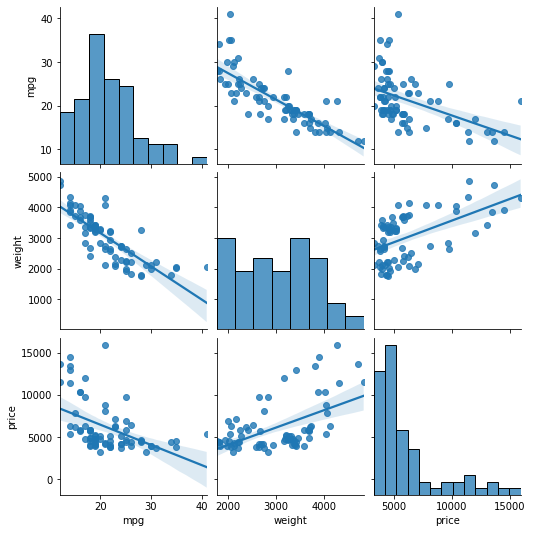

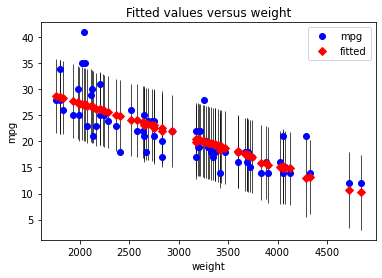

In [3]:
auto['mpg'].describe()
auto[['mpg', 'weight']].describe()
auto[['mpg', 'weight']].mean()
auto[['mpg', 'weight']].std()
sns.pairplot(auto, vars=['mpg', 'weight', 'price'], kind='reg')
model1 = ols('mpg ~ weight + price', data=auto)
fit1 = model1.fit()
fit1.summary()
plot_fit(fit1, 'weight')
fit1.predict()
fit1.resid

## Interaction Terms (will include main effects)

In [4]:
ols('mpg ~ weight * price', data=auto).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     53.88
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           3.67e-18
Time:                        15:24:29   Log-Likelihood:                -190.12
No. Observations:                  74   AIC:                             388.2
Df Residuals:                      70   BIC:                             397.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.3811      4.304     12.172      0.000      43.798      60.964
weight          -0.0095      0.001     -7.388      0.000      -0.012      -0.007
price           -0.0024      0.001     -3.272      0.002      -0.004      -0.001
weight:price  6.137e-07   1.91e-07      3.216      0.002    2.33e-07    9.94e-07
==============================================================================
Omnibus:                       34.594   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.324
Skew:                           1.507   Prob(JB):                     2.43e-20
Kurtosis:                       7.496   Cond. No.                     2.77e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model with categorical variable & robust standard errors (same as Stata's reg, robust)<br>
### [documentation for standard errors](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) (search for HC0_se, HC1_se, etc.)

0.6486824257654054

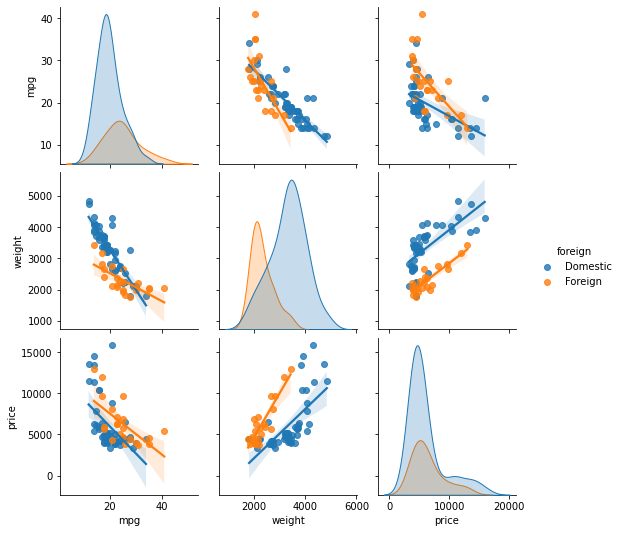

In [5]:
auto.groupby('foreign').size()
auto.groupby('foreign').mpg.mean()
sns.pairplot(auto, vars=['mpg', 'weight', 'price'], kind='reg', hue='foreign')
fit2 = ols('mpg ~ weight + price + foreign', data=auto).fit(cov_type='HC1')
fit2.summary()
fit2.params
fit2.bse
fit2.tvalues
fit2.pvalues
fit2.conf_int()
fit2.rsquared
fit2.rsquared_adj

## factor (from continuous variable)

In [6]:
auto.columns
auto['displacement'].describe()
pd.qcut(auto['displacement'], 3, labels=['low', 'med', 'high'])
auto['disp2'] = pd.qcut(auto['displacement'], 3, labels=['low', 'med', 'high'])
fit3 = ols('mpg ~ weight + disp2', data=auto).fit()
fit3.summary()
fit3b = ols("mpg ~ weight + C(disp2, Treatment(reference='med'))", data=auto).fit()
fit3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     43.70
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           4.98e-16
Time:                        15:24:32   Log-Likelihood:                -195.35
No. Observations:                  74   AIC:                             398.7
Df Residuals:                      70   BIC:                             407.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       39.5889      3.134     12.634      0.000      33.339      45.839
C(disp2, Treatment(reference='med'))[T.low]      0.0706      1.328      0.053      0.958      -2.579       2.720
C(disp2, Treatment(reference='med'))[T.high]     0.3301      1.211      0.273      0.786      -2.084       2.744
weight                                          -0.0061      0.001     -6.344      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       26.924   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.957
Skew:                           1.300   Prob(JB):                     8.61e-12
Kurtosis:                       6.124   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## compare models

In [7]:
summary_col([fit1, fit2, fit3], stars=True)

,mpg I,mpg II,mpg III
Intercept,39.4397***,41.9595***,39.6595***
,(1.6216),(1.7330),(2.2359)
R-squared,0.6531,0.6631,0.6519
R-squared Adj.,0.6434,0.6487,0.6370
disp2[T.high],,,0.2595
,,,(1.8941)
disp2[T.med],,,-0.0706
,,,(1.3283)
foreign[T.Foreign],,-1.8559,
,,(1.4197),


## write results to CSV file

In [8]:
with open('mod3_summary.csv', 'w') as f:
    f.write(fit3.summary().as_csv())

## table for regression models

In [9]:
tab_params = pd.concat([fit1.params, fit2.params, fit3.params], axis=1,
                       keys=['Model 1', 'Model 2', 'Model 3'])
tab_bse = pd.concat([fit1.bse, fit2.bse, fit3.bse], axis=1,
                       keys=['Model 1', 'Model 2', 'Model 3'])
tab_params['stat'] = 'Beta'
tab_bse['stat'] = 'Std Error'
tab_all = tab_params.append(tab_bse)
tab_all.sort_index()
tab_all.sort_index().to_csv('table_models.csv')
## other options: https://github.com/mwburke/stargazer/blob/master/examples.ipynb
##                writes out html and latex files (for OLS models)

# Logit Models

In [10]:
auto.foreign.value_counts()

Domestic    52
Foreign     22
Name: foreign, dtype: int64

## convert outcome to 0/1

In [11]:
auto['foreign'].replace(('Foreign', 'Domestic'), (1, 0))
auto['foreign_1_0'] = auto['foreign'].replace(('Foreign', 'Domestic'), (1, 0))

## seaborn's plotting tool

<AxesSubplot:xlabel='weight', ylabel='foreign_1_0'>

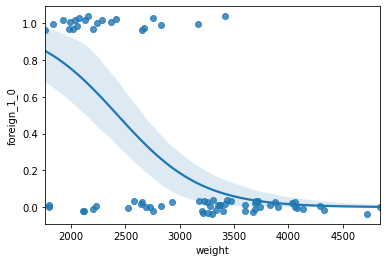

In [12]:
sns.regplot(x="weight", y="foreign_1_0", data=auto, logistic=True, y_jitter=0.04)

## fit model and get predicted probabilities

Optimization terminated successfully.
         Current function value: 0.242924
         Iterations 9


<AxesSubplot:xlabel='weight', ylabel='foreign_hat'>

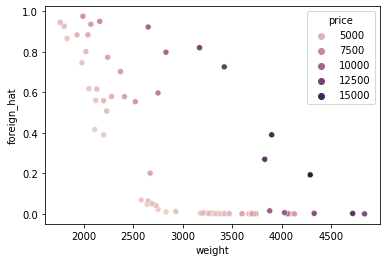

In [13]:
fit4 = logit('foreign_1_0 ~ weight + price', data=auto).fit()
fit4.summary()
predProbs = fit4.predict()
predProbs
auto['foreign_hat'] = predProbs
sns.scatterplot(data=auto, x='weight', y='foreign_hat', hue='price')

## another example of recoding: continuous variable -> categorical

In [14]:
auto.columns
auto['trunk']
auto['trunk'].value_counts()
auto['trunk_new'] = np.nan
auto.loc[auto['trunk'] <= 11, 'trunk_new'] = 1
auto[['trunk', 'trunk_new']]
auto.loc[(auto['trunk'] > 11) & (auto['trunk'] < 17), 'trunk_new'] = 2
auto[['trunk', 'trunk_new']]
auto.loc[auto['trunk'] >= 17, 'trunk_new'] = 3

In [15]:
logit('foreign_1_0 ~ C(trunk_new)', data=auto).fit().summary()

         Current function value: 0.497259
         Iterations: 35


/home/method/.pyenv/versions/ipr-python-stats/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            foreign_1_0   No. Observations:                   74
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1829
Time:                        15:24:36   Log-Likelihood:                -36.797
converged:                      False   LL-Null:                       -45.033
Covariance Type:            nonrobust   LLR p-value:                 0.0002649
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2231      0.387     -0.576      0.565      -0.982       0.536
C(trunk_new)[T.2.0]    -0.3646      0.553     -0.660      0.509      -1.448       0.719
C(trunk_new)[T.3.0]   -17.6521   1746.568     -0.010      0.992   -3440.863    3405.559
=======================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

*what's the problem hear?*

In [16]:
pd.crosstab(auto['trunk_new'], auto['foreign_1_0'])

foreign_1_0,0,1
trunk_new,,
1.0,15,12
2.0,18,10
3.0,19,0


*ah, there are no foreign cars with trunk_new == 3*

## marginal effects (does not work for interaction or polynomial terms)

In [17]:
marginal_foreign = fit4.get_margeff(at='overall')
marginal_foreign.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            foreign_1_0
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0005   5.39e-05     -8.491      0.000      -0.001      -0.000
price       7.239e-05    1.4e-05      5.186      0.000     4.5e-05    9.97e-05
==============================================================================
"""

## another example with marginal predicted probabilities<br>
[try to reproduce this example](https://stats.idre.ucla.edu/stata/dae/using-margins-for-predicted-probabilities/) (still not there, need standard errors!)

In [18]:
hsb = pd.read_stata('https://stats.idre.ucla.edu/stat/data/hsbdemo.dta',
                    preserve_dtypes=False)
hsb.info()
pd.get_dummies(hsb.honors)
hsb['enrolled'] = pd.get_dummies(hsb.honors, drop_first=True)
hsb[['honors', 'enrolled']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    float64 
 1   female   200 non-null    category
 2   ses      200 non-null    category
 3   schtyp   200 non-null    category
 4   prog     200 non-null    category
 5   read     200 non-null    float64 
 6   write    200 non-null    float64 
 7   math     200 non-null    float64 
 8   science  200 non-null    float64 
 9   socst    200 non-null    float64 
 10  honors   200 non-null    category
 11  awards   200 non-null    float64 
 12  cid      200 non-null    int64   
dtypes: category(5), float64(7), int64(1)
memory usage: 15.7 KB


,honors,enrolled
0,not enrolled,0
1,not enrolled,0
2,not enrolled,0
3,not enrolled,0
4,not enrolled,0
...,...,...
195,enrolled,1
196,enrolled,1
197,enrolled,1
198,enrolled,1


In [19]:
fit6 = logit('enrolled ~ C(female) + read', data=hsb).fit()
## compare predictions to observed (correct predictions on diagonal)
fit6.pred_table()
fit6.summary()
hsb['mu_read'] = hsb.read.mean()
pred_hsb = hsb.copy()
pred_hsb['read'] = hsb.read.mean()
pred_enrolled = fit6.predict(exog=pred_hsb)
pred_hsb['y_hat'] = fit6.predict(exog=pred_hsb)
pred_hsb.groupby('female').y_hat.mean()

Optimization terminated successfully.
         Current function value: 0.427219
         Iterations 7


female
male      0.112731
female    0.280453
Name: y_hat, dtype: float64